# Tarea 3

## Introduccion

En un modelo simple de formación y evolución de estrellas, el gas atómico se
convierte en gas molecular que a su vez se convierte en estrellas. Luego las estrellas al desintegrarse vuelven a formar gas atómico. Si a es la fracción de masa de gas atómico, m la fracción de masa de
gas molecular y s la fracción de masa de estrellas activas, entonces:

$$  a + m + s = 1 $$

donde 1 es la masa total considerada, y para ciertas constantes $k_1 > 0$ , $k_2 > 0$ y  $\alpha > 1$ se tiene

$$ \frac{da}{dt} = s - k_1 m^2 a $$

$$ \frac{dm}{dt} = k_1 m^2 a - k_2 m^\alpha s $$

donde t se mide en millones de años y definiremos un intervalo de $[0, T]$ con $T = 100$ (millones de años) y un paso de tiempo de $\Delta t = 0.1$. Considere las siguientes combinaciones de parámetros:

In [53]:
params = { "k1" : [10, 8, 8, 8, 8, 8], \
           "k2" : [10, 15, 15, 15, 15, 15], \
           "alpha": [1.0, 1.2, 1.5, 1.9, 2.0, 2.1], \
           "a0": [0.15, 0.4, 0.4, 0.4, 0.4, 0.4], \
           "m0": [0.15, 0.3, 0.3, 0.3, 0.3, 0.3] }

### Librerías

In [54]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import time
#Libreria para encontrar picos
from scipy.signal import find_peaks

## Inciso 1

1. Resuelva numéricamente el sistema usando el método de Euler para obtener la evolución de la masa de estrellas s para una fracción inicial de gas atómico y molecular de a(0) y m(0) en los distintos 6 casos del diccionario entregado. Grafique superpuestas las tres curvas de a, m y s en cada caso etiquetando las curvas. Si en alguno de los casos el método de Euler diverge, esto es, si obtiene valores muy grandes fuera del rango $[0, 1]$, disminuya el paso de tiempo $\Delta t$ hasta obtener convergencia y repórtelo.

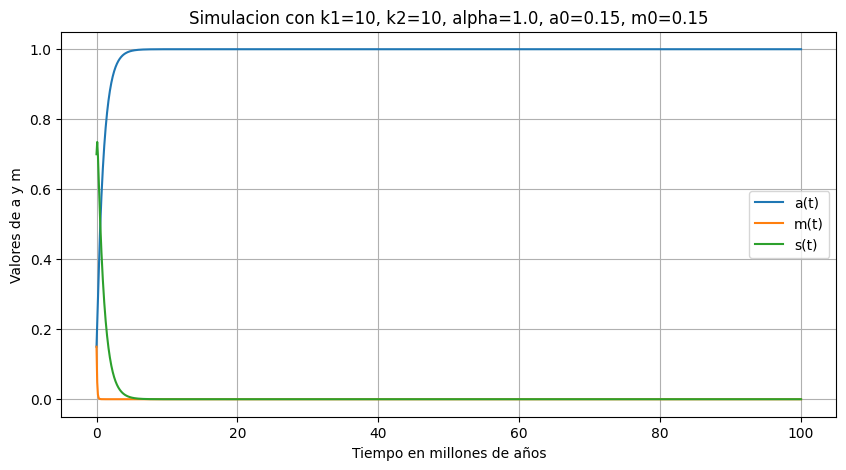

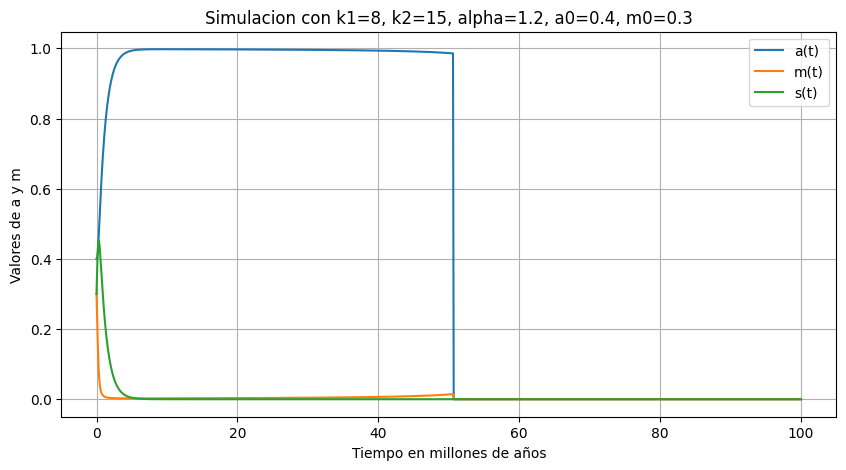

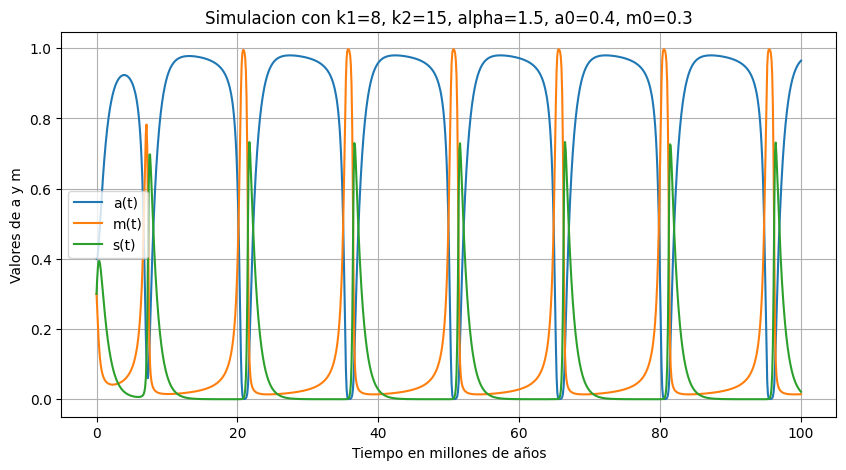

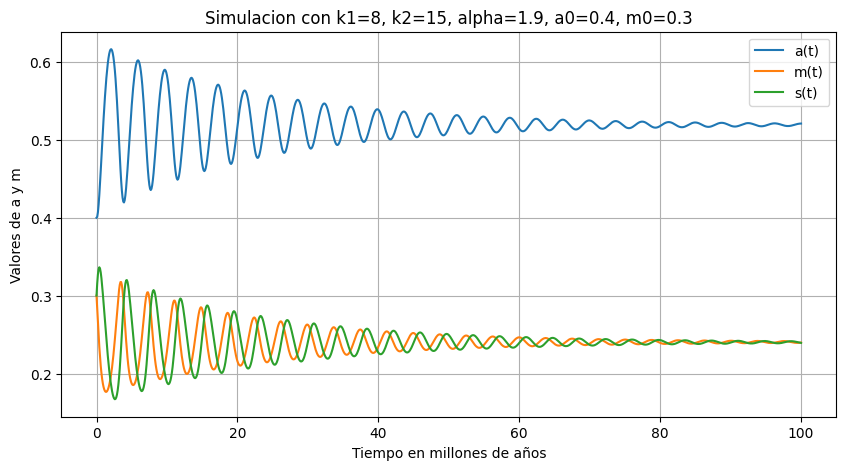

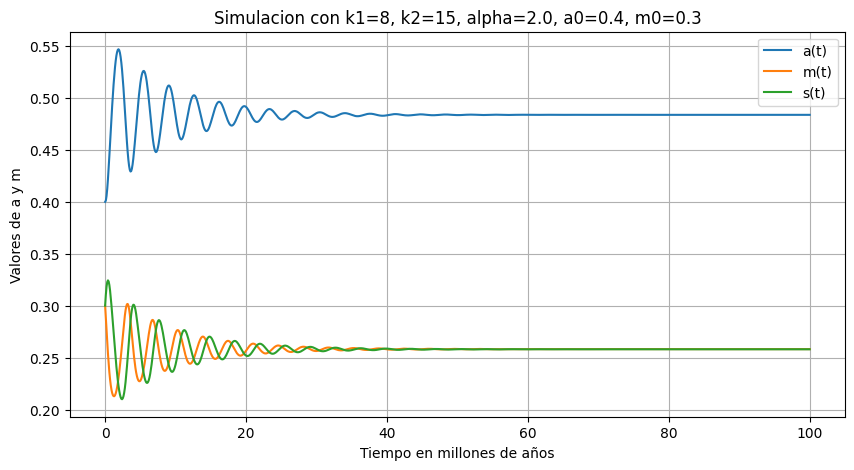

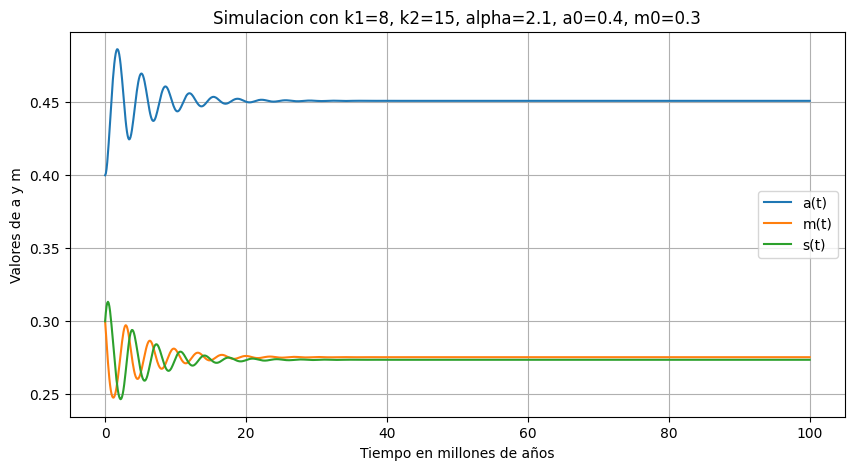

Tiempo de ejecucion del metodo de Euler: 0.9840 segundos


In [55]:
inicio = time.time()

for i in range(len(params["k1"])):
    a0 = params["a0"][i]
    m0 = params["m0"][i]
    k1 = params["k1"][i]
    k2 = params["k2"][i]
    alpha = params["alpha"][i]

    # Ancho de los intervalos, reducir si es necesario
    dt = 0.1
    t = np.linspace(0, 100, int(100 / dt) + 1)   # Malla temporal
    N = len(t)

    # Arreglos con valores de a, m, s
    a = np.zeros(N)
    m = np.zeros(N)
    s = np.zeros(N)

    # Condiciones iniciales
    a[0] = a0
    m[0] = m0
    s[0] = 1.0 - a0 - m0

    # Condicion de estabilidad 
    divergencia = False

    for n_idx in range(N - 1):
        an = a[n_idx]
        mn = m[n_idx]
        sn = 1.0 - an - mn                

        # Evaluamos las derivadas
        fa = sn - k1 * (mn ** 2) * an
        fm = k1 * (mn ** 2) * an - k2 * (mn ** alpha) * sn

        a_new = an + dt * fa
        m_new = mn + dt * fm

        # Verificamos si los nuevos valores son validos fisicamente
        if (not np.isfinite(a_new)) or (not np.isfinite(m_new)) or (a_new < 0.0) or (m_new < 0.0) or (a_new + m_new > 1.0):
            diverged = True
            break

        a[n_idx + 1] = a_new
        m[n_idx + 1] = m_new
        s[n_idx + 1] = 1.0 - a_new - m_new

    # Graficamos resultados 
    plt.figure(figsize=(10, 5))
    plt.plot(t, a, label='a(t)')
    plt.plot(t, m, label='m(t)')
    plt.plot(t, s, label='s(t)')
    plt.title(f'Simulacion con k1={k1}, k2={k2}, alpha={alpha}, a0={a0}, m0={m0}')
    plt.xlabel('Tiempo en millones de años')
    plt.ylabel('Valores de a y m')
    plt.legend()
    plt.grid()
    plt.show()

fin = time.time()

tiempo_euler = fin - inicio
print(f"Tiempo de ejecucion del metodo de Euler: {tiempo_euler:.4f} segundos")


Notamos que, en los primeros 3 casos las funciones a(t) y m(t) se comportan extrañamente y no parecen converger a nada pese a modificar los valores de dt. Sin embargo, para los 3 siguientes notamos una tendencia a oscilar alrededor de una valor dado para cada función al cual se termina llegando.  

## Inciso 2

2. Grafique en un plano (a(t) , m(t)) las trayectorias en función del tiempo (este plano es llamado plano de fases). Comente qué tipo de comportamiento observa en cada caso? e investigue y describa qué significa la evolución hacia un estado estacionario y la evolución hacia un ciclo límite.

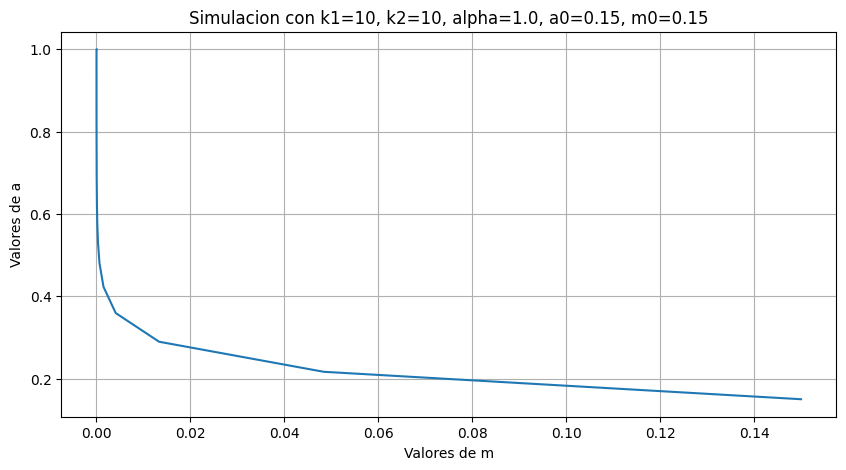

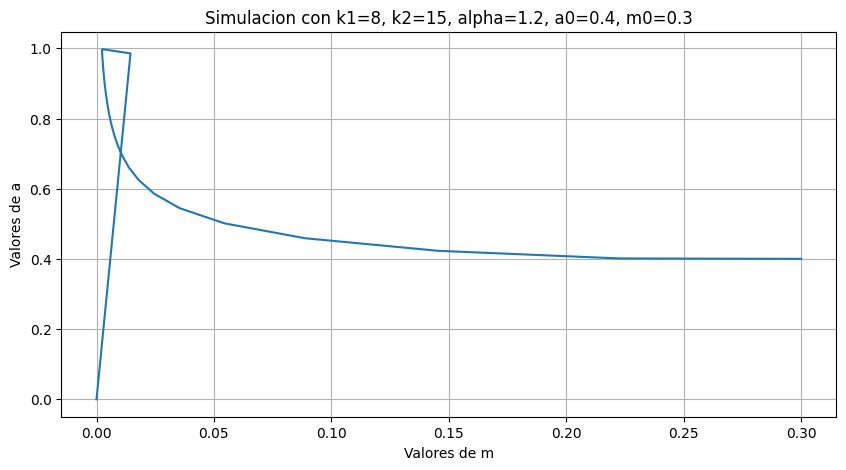

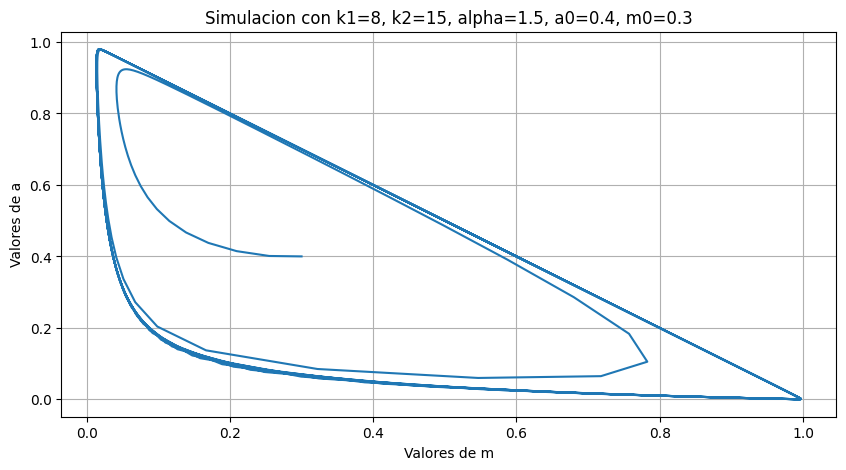

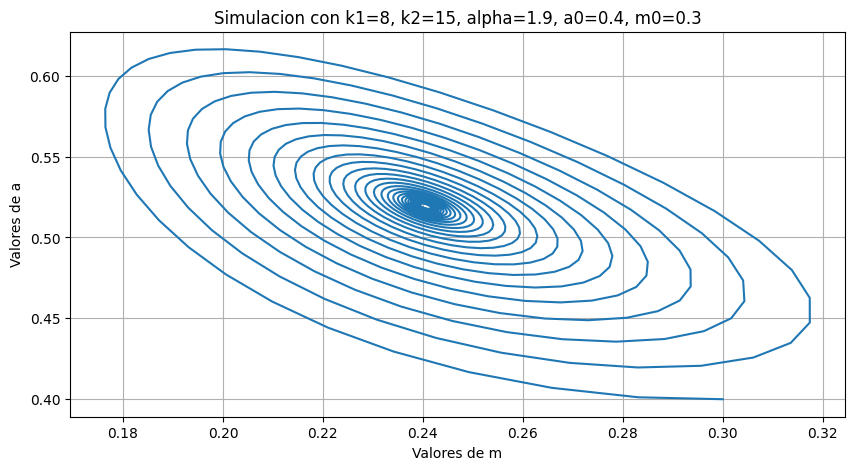

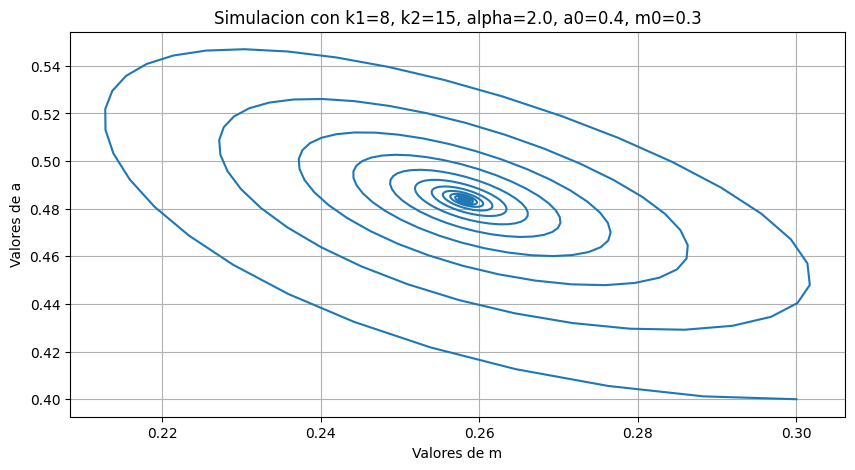

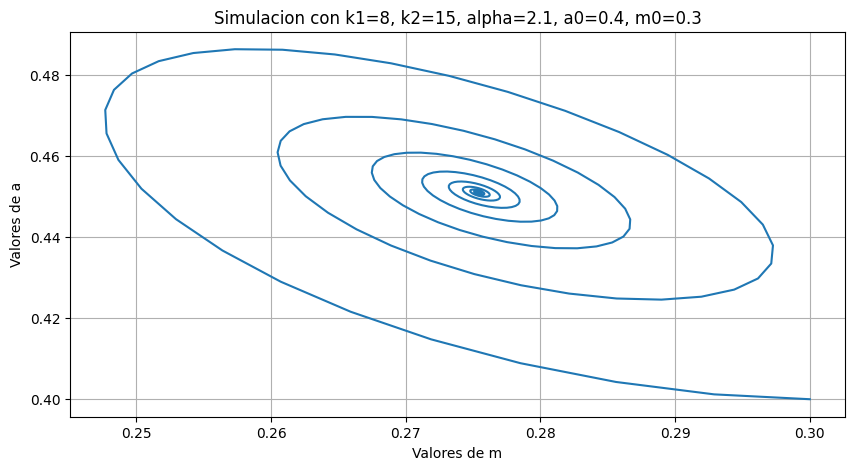

Tiempo de ejecucion del metodo de Euler: 0.7980 segundos


In [56]:
inicio = time.time()

for i in range(len(params["k1"])):
    a0 = params["a0"][i]
    m0 = params["m0"][i]
    k1 = params["k1"][i]
    k2 = params["k2"][i]
    alpha = params["alpha"][i]

    # Ancho de los intervalos, reducir si es necesario
    dt = 0.1
    t = np.linspace(0, 100, int(100 / dt) + 1)   # Malla temporal
    N = len(t)

    # Arreglos con valores de a, m, s
    a = np.zeros(N)
    m = np.zeros(N)
    s = np.zeros(N)

    # Condiciones iniciales
    a[0] = a0
    m[0] = m0
    s[0] = 1.0 - a0 - m0

    for n_idx in range(N - 1):
        an = a[n_idx]
        mn = m[n_idx]
        sn = 1.0 - an - mn                

        # Evaluamos las derivadas
        fa = sn - k1 * (mn ** 2) * an
        fm = k1 * (mn ** 2) * an - k2 * (mn ** alpha) * sn

        a_new = an + dt * fa
        m_new = mn + dt * fm

        # Verificamos si los nuevos valores son validos fisicamente
        if (not np.isfinite(a_new)) or (not np.isfinite(m_new)) or (a_new < 0.0) or (m_new < 0.0) or (a_new + m_new > 1.0):
            break

        a[n_idx + 1] = a_new
        m[n_idx + 1] = m_new
        s[n_idx + 1] = 1.0 - a_new - m_new

    # Graficamos resultados 
    plt.figure(figsize=(10, 5))
    plt.plot(m, a, label='m(t) vs a(t)')
    plt.title(f'Simulacion con k1={k1}, k2={k2}, alpha={alpha}, a0={a0}, m0={m0}')
    plt.xlabel('Valores de m')
    plt.ylabel('Valores de a')
    plt.grid()
    plt.show()

fin = time.time()

tiempo_euler = fin - inicio
print(f"Tiempo de ejecucion del metodo de Euler: {tiempo_euler:.4f} segundos")


Utilizando el mismo bloque de codigo anterior, cambiamos a la altura de la creación de los gráficos de manera de obtener una comparación de a(t) vs m(t). Una vez más, notamos que para los 3 primeros casos no se logra nada interesante pero para los 3 siguientes se alcanza una proporción entre gas atomico y gas molecular que favorece la creación de la estrella.

## Inciso 3

3. Los siguientes ejercicios serán con los datos del segundo caso de la tabla pero
haciendo variar $1.3 \le \alpha \le 1.9$. Suponiendo que la evolución del sistema tiende a un cierto equilibrio periódico. Con qué frecuencia se reproducen las estrellas? Piense y programe algún algoritmo para estimar el periodo límite. Grafique este periodo límite en función de $\alpha$. Es
una función creciente o decreciente?

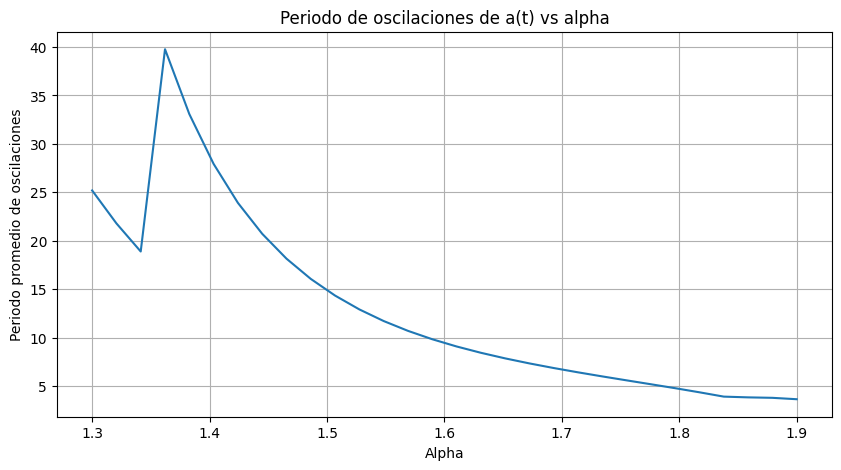

Tiempo de ejecucion del metodo de Euler para varios alpha: 2.4496 segundos


In [57]:
#Condiciones iniciales
k1 = params["k1"][1]
k2 = params["k2"][1]
a0 = params["a0"][1]
m0 = params["m0"][1]

#Rango de alpha
alphas = np.linspace(1.3, 1.9, 30) #Entre 1.3 y 1.9, con aumento de 0.02

#Paramentros de Euler
dt = 0.1
Tmax = 2000
n = int(Tmax/dt)
t = np.linspace(0, Tmax, n)

periodos_euler = []

inicio = time.time()
for alpha in alphas:
    a = np.zeros(n)
    m = np.zeros(n)
    s = np.zeros(n)

    a[0] = a0
    m[0] = m0
    s[0] = 1.0 - a0 - m0

    #Metodo de euler
    for i in range(n-1):
        an = a[i]
        mn = m[i]
        sn = 1.0 - an - mn                

        fa = sn - k1 * (mn ** 2) * an
        fm = k1 * (mn ** 2) * an - k2 * (mn ** alpha) * sn

        a_new = an + dt * fa
        m_new = mn + dt * fm

        #Verificamos si los nuevos valores son validos fisicamente
        if (not np.isfinite(a_new)) or (not np.isfinite(m_new)) or (a_new < 0.0) or (m_new < 0.0) or (a_new + m_new > 1.0):
            break

        #Actualizamos valores    
        a[i + 1] = a_new
        m[i + 1] = m_new
        s[i + 1] = 1.0 - a_new - m_new

    #Encontrar maximos locales en a(t)
    maximos, idx = find_peaks(a, height=0) #Encontrar indices de maximos locales

    #Calcular periodo promedio si hay al menos dos maximos
    if len(maximos) > 1:
        #Calcular periodos entre maximos consecutivos
        tiempo_maximos = t[maximos] # tiempos en los que ocurren los maximos
        periods = np.diff(tiempo_maximos) # diferencias entre tiempos consecutivos
        periodo_prom = np.mean(periods) # periodo promedio
        periodos_euler.append(periodo_prom) 

fin = time.time()
tiempo_euler = fin - inicio

#Graficar periodo vs alpha
plt.figure(figsize=(10, 5))
plt.plot(alphas, periodos_euler)
plt.title('Periodo de oscilaciones de a(t) vs alpha')
plt.xlabel('Alpha')
plt.ylabel('Periodo promedio de oscilaciones')
plt.grid()
plt.show()
#Tiempo de ejecucion
print(f"Tiempo de ejecucion del metodo de Euler para varios alpha: {tiempo_euler:.4f} segundos")

## Inciso 4

4. Resuelva el mismo problema (3), pero esta vez usando Runge-Kutta de orden 4 (debe programar el método primero usted mismo). Se reproducen con la misma frecuencia las estrellas? Compare con lo que obtuvo en la parte (3) para un mismo paso de tiempo.

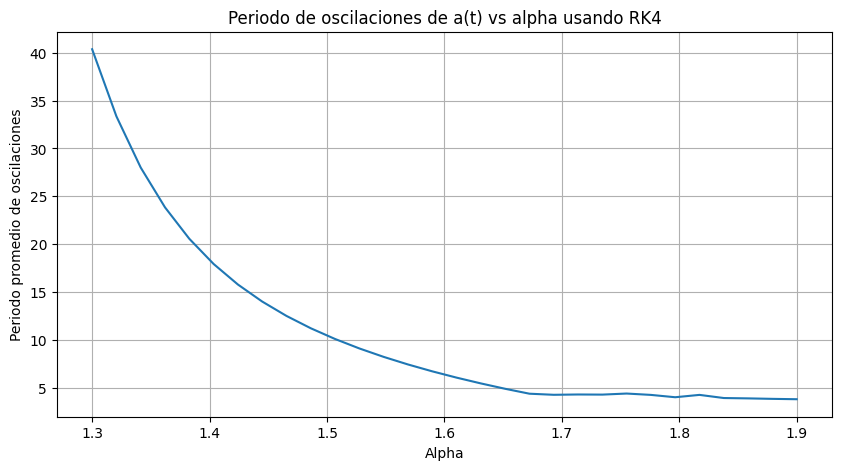

Tiempo de ejecucion del metodo de Runge-Kutta 4to orden para varios alpha: 5.1064 segundos


In [58]:
#Condiciones iniciales
k1 = params["k1"][1]
k2 = params["k2"][1]
a0 = params["a0"][1]
m0 = params["m0"][1]

#Rango de alpha
alphas = np.linspace(1.3, 1.9, 30) #Entre 1.3 y 1.9, con aumento de 0.02

#Paramentros de Runge-Kutta
dt = 0.1
Tmax = 2000
n = int(Tmax/dt)
t = np.linspace(0, Tmax, n)

periodos_rk4 = []

inicio = time.time()

for alpha in alphas:
    a = np.zeros(n)
    m = np.zeros(n)
    s = np.zeros(n)

    a[0] = a0
    m[0] = m0
    s[0] = 1.0 - a0 - m0

    #Metodo de Runge-Kutta 4to orden
    for i in range(n-1):
        an = a[i]
        mn = m[i]
        sn = 1.0 - an - mn                

        #Calculo de k1
        fa1 = sn - k1 * (mn ** 2) * an
        fm1 = k1 * (mn ** 2) * an - k2 * (mn ** alpha) * sn

        #Calculo de k2
        a_temp = an + dt/2 * fa1
        m_temp = mn + dt/2 * fm1
        s_temp = 1.0 - a_temp - m_temp
        fa2 = s_temp - k1 * (m_temp ** 2) * a_temp
        fm2 = k1 * (m_temp ** 2) * a_temp - k2 * (m_temp ** alpha) * s_temp

        #Calculo de k3
        a_temp = an + dt/2 * fa2
        m_temp = mn + dt/2 * fm2
        s_temp = 1.0 - a_temp - m_temp
        fa3 = s_temp - k1 * (m_temp ** 2) * a_temp
        fm3 = k1 * (m_temp ** 2) * a_temp - k2 * (m_temp ** alpha) * s_temp

        #Calculo de k4
        a_temp = an + dt * fa3
        m_temp = mn + dt * fm3
        s_temp = 1.0 - a_temp - m_temp
        fa4 = s_temp - k1 * (m_temp ** 2) * a_temp
        fm4 = k1 * (m_temp ** 2) * a_temp - k2 * (m_temp ** alpha) * s_temp

        #Actualizamos valores usando la formula de RK4
        a_new = an + (dt / 6.0) * (fa1 + 2*fa2 + 2*fa3 + fa4)
        m_new = mn + (dt / 6.0) * (fm1 + 2*fm2 + 2*fm3 + fm4)

        #Verificamos si los nuevos valores son validos fisicamente
        if (not np.isfinite(a_new)) or (not np.isfinite(m_new)) or (a_new < 0.0) or (m_new < 0.0) or (a_new + m_new > 1.0):
            break

        #Actualizamos valores
        a[i + 1] = a_new
        m[i + 1] = m_new
        s[i + 1] = 1.0 - a_new - m_new

    #Encontrar maximos locales en a(t) 
    maximos, idx = find_peaks(a, height=0) #Encontrar indices de maximos locales
    
    #Calcular periodo promedio si hay al menos dos maximos
    if len(maximos) > 1:
        #Calcular periodos entre maximos consecutivos
        tiempo_maximos = t[maximos] # tiempos en los que ocurren los maximos
        periods = np.diff(tiempo_maximos) # diferencias entre tiempos consecutivos
        periodo_prom = np.mean(periods) # periodo promedio
        periodos_rk4.append(periodo_prom)
    
fin = time.time()
tiempo_rk4 = fin - inicio

#Graficar periodo vs alpha
plt.figure(figsize=(10, 5))
plt.plot(alphas, periodos_rk4)
plt.title('Periodo de oscilaciones de a(t) vs alpha usando RK4')
plt.xlabel('Alpha')
plt.ylabel('Periodo promedio de oscilaciones')
plt.grid()
plt.show()

#Tiempo de ejecucion
print(f"Tiempo de ejecucion del metodo de Runge-Kutta 4to orden para varios alpha: {tiempo_rk4:.4f} segundos")

Resuelva el mismo problema (3) pero esta vez usando la librería vista en clases, utilice todos los distintos metodos que ella contiene, que sean posible de usar, y compare con los resultados obtenidos en (3) y (4) graficando los tres resultados en un solo gráfico y etiquetando las curvas.

### Runge-Kutta 45

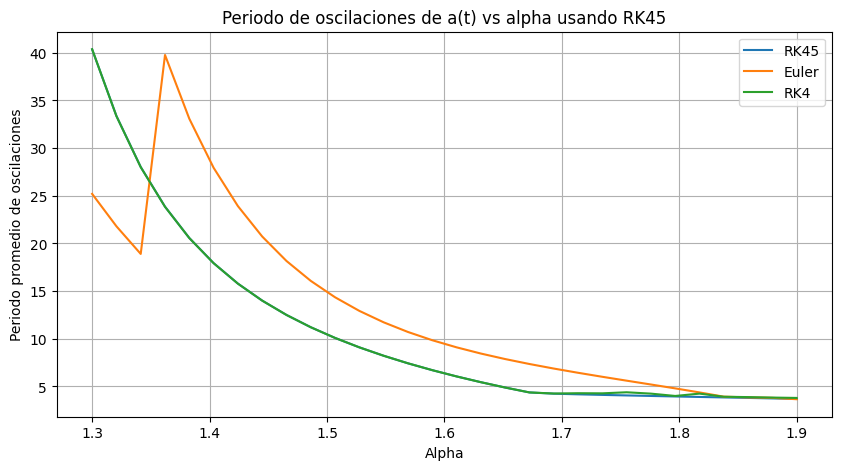

Tiempo de ejecucion del metodo RK45 para varios alpha: 28.3843 segundos


In [ ]:
#Metodo de scipy
metodo = 'RK45'

#Condiciones iniciales
k1 = params["k1"][1]
k2 = params["k2"][1]
a0 = params["a0"][1]
m0 = params["m0"][1]

#Rango de alpha
alphas = np.linspace(1.3, 1.9, 30) #Entre 1.3 y 1.9, con aumento de 0.02

def sistema(t, y, k1, k2, alpha):
    a, m = y
    s = 1.0 - a - m
    da_dt = s - k1 * (m ** 2) * a
    dm_dt = k1 * (m ** 2) * a - k2 * (m ** alpha) * s
    return [da_dt, dm_dt]

# Parametros para solve_ivp
y0 = [a0, m0]  # Condiciones iniciales
t_eval = np.linspace(0, 2000, 20001)  # Puntos donde se evalua la solucion
rtol, atol = 1e-7, 1e-10  # Tolerancias


periodos = []
inicio = time.time()
for alpha in alphas:
    sol = solve_ivp(sistema, [0, 2000], y0, args=(k1, k2, alpha), method=metodo, t_eval=t_eval, rtol=rtol, atol=atol)
    a = sol.y[0]
    t = sol.t
    error = sol.message
success = sol.success

    #Si el metodo no convergio, imprimimos el mensaje y el valor de alpha
    if success == False:
        print(f"El metodo {metodo} no convergio para alpha={alpha}. Mensaje: {error}")

    

    # Encontrar maximos locales en a(t)
    maximos, idx = find_peaks(a, height=0)

    # Calcular periodo promedio si hay al menos dos maximos
    if len(maximos) > 1:
        tiempo_maximos = t[maximos]
        periods = np.diff(tiempo_maximos)
        periodo_prom = np.mean(periods)
        periodos.append(periodo_prom)

fin = time.time()
tiempo_rk45 = fin - inicio

# Graficar periodo vs alpha
plt.figure(figsize=(10, 5))
plt.plot(alphas, periodos, label=metodo)
plt.plot(alphas, periodos_euler, label='Euler')
plt.plot(alphas, periodos_rk4, label='RK4')
plt.title(f'Periodo de oscilaciones de a(t) vs alpha usando {metodo}')
plt.xlabel('Alpha')
plt.ylabel('Periodo promedio de oscilaciones')
plt.legend()
plt.grid()
plt.show()

print(f"Tiempo de ejecucion del metodo {metodo} para varios alpha: {tiempo_rk45:.4f} segundos")


### Runge-Kutta 23

El metodo RK23 no convergio para alpha=1.3. Mensaje: Required step size is less than spacing between numbers.


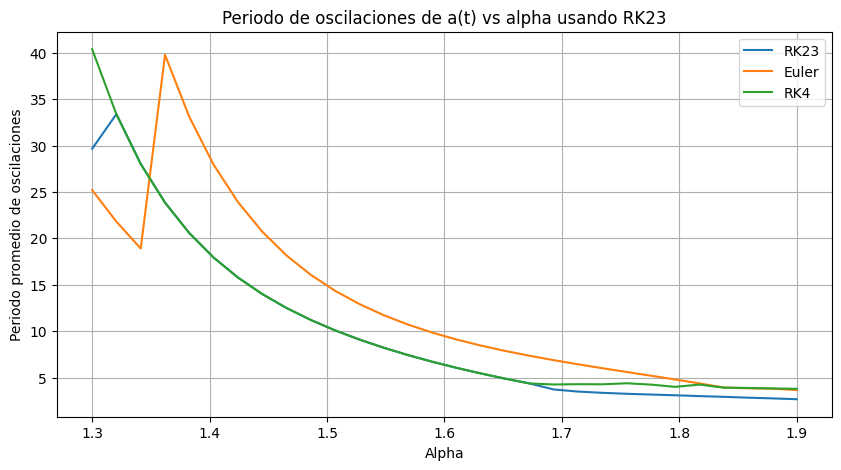

Tiempo de ejecucion del metodo RK23 para varios alpha: 142.5990 segundos


In [60]:
#Metodo de scipy
metodo = 'RK23'

#Condiciones iniciales
k1 = params["k1"][1]
k2 = params["k2"][1]
a0 = params["a0"][1]
m0 = params["m0"][1]

#Rango de alpha
alphas = np.linspace(1.3, 1.9, 30) #Entre 1.3 y 1.9, con aumento de 0.02

def sistema(t, y, k1, k2, alpha):
    a, m = y
    s = 1.0 - a - m
    da_dt = s - k1 * (m ** 2) * a
    dm_dt = k1 * (m ** 2) * a - k2 * (m ** alpha) * s
    return [da_dt, dm_dt]

# Parametros para solve_ivp
y0 = [a0, m0]  # Condiciones iniciales
t_eval = np.linspace(0, 2000, 20001)  # Puntos donde se evalua la solucion
rtol, atol = 1e-7, 1e-10  # Tolerancias


periodos = []
inicio = time.time()
for alpha in alphas:
    sol = solve_ivp(sistema, [0, 2000], y0, args=(k1, k2, alpha), method=metodo, t_eval=t_eval, rtol=rtol, atol=atol)
    a = sol.y[0]
    t = sol.t
    error = sol.message
    success = sol.success

    #Si el metodo no convergio, imprimimos el mensaje y el valor de alpha
    if success == False:
        print(f"El metodo {metodo} no convergio para alpha={alpha}. Mensaje: {error}")

    

    # Encontrar maximos locales en a(t)
    maximos, idx = find_peaks(a, height=0)

    # Calcular periodo promedio si hay al menos dos maximos
    if len(maximos) > 1:
        tiempo_maximos = t[maximos]
        periods = np.diff(tiempo_maximos)
        periodo_prom = np.mean(periods)
        periodos.append(periodo_prom)

fin = time.time()
tiempo_rk23 = fin - inicio

# Graficar periodo vs alpha
plt.figure(figsize=(10, 5))
plt.plot(alphas, periodos, label=metodo)
plt.plot(alphas, periodos_euler, label='Euler')
plt.plot(alphas, periodos_rk4, label='RK4')
plt.title(f'Periodo de oscilaciones de a(t) vs alpha usando {metodo}')
plt.xlabel('Alpha')
plt.ylabel('Periodo promedio de oscilaciones')
plt.legend()
plt.grid()
plt.show()

print(f"Tiempo de ejecucion del metodo {metodo} para varios alpha: {tiempo_rk23:.4f} segundos")


### DOP853

El metodo DOP853 no convergio para alpha=1.3. Mensaje: Required step size is less than spacing between numbers.
El metodo DOP853 no convergio para alpha=1.3206896551724139. Mensaje: Required step size is less than spacing between numbers.


C:\Users\bvial\AppData\Local\Temp\ipykernel_6564\3715139935.py:17: RuntimeWarning: invalid value encountered in scalar power
  dm_dt = k1 * (m ** 2) * a - k2 * (m ** alpha) * s


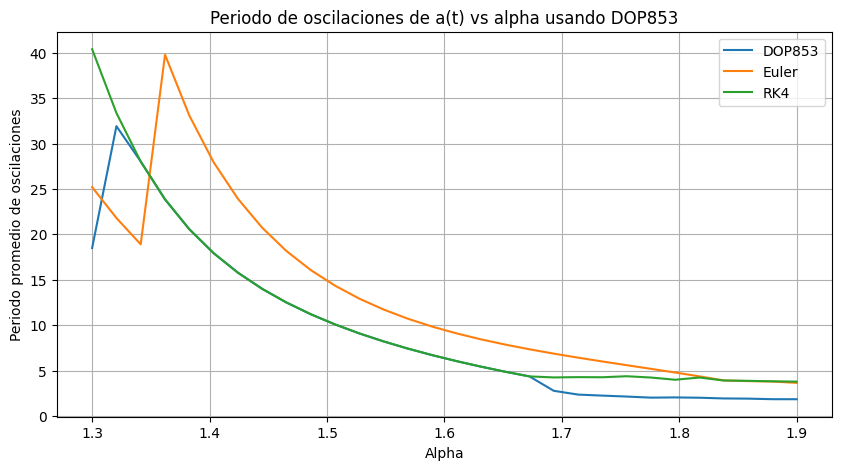

Tiempo de ejecucion del metodo DOP853 para varios alpha: 25.8945 segundos


In [61]:
#Metodo de scipy
metodo = 'DOP853'

#Condiciones iniciales
k1 = params["k1"][1]
k2 = params["k2"][1]
a0 = params["a0"][1]
m0 = params["m0"][1]

#Rango de alpha
alphas = np.linspace(1.3, 1.9, 30) #Entre 1.3 y 1.9, con aumento de 0.02

def sistema(t, y, k1, k2, alpha):
    a, m = y
    s = 1.0 - a - m
    da_dt = s - k1 * (m ** 2) * a
    dm_dt = k1 * (m ** 2) * a - k2 * (m ** alpha) * s
    return [da_dt, dm_dt]

# Parametros para solve_ivp
y0 = [a0, m0]  # Condiciones iniciales
t_eval = np.linspace(0, 2000, 20001)  # Puntos donde se evalua la solucion
rtol, atol = 1e-7, 1e-10  # Tolerancias


periodos = []
inicio = time.time()
for alpha in alphas:
    sol = solve_ivp(sistema, [0, 2000], y0, args=(k1, k2, alpha), method=metodo, t_eval=t_eval, rtol=rtol, atol=atol)
    a = sol.y[0]
    t = sol.t
    error = sol.message
    success = sol.success

    #Si el metodo no convergio, imprimimos el mensaje y el valor de alpha
    if success == False:
        print(f"El metodo {metodo} no convergio para alpha={alpha}. Mensaje: {error}")

    

    # Encontrar maximos locales en a(t)
    maximos, idx = find_peaks(a, height=0)

    # Calcular periodo promedio si hay al menos dos maximos
    if len(maximos) > 1:
        tiempo_maximos = t[maximos]
        periods = np.diff(tiempo_maximos)
        periodo_prom = np.mean(periods)
        periodos.append(periodo_prom)

fin = time.time()
tiempo_dop = fin - inicio

# Graficar periodo vs alpha
plt.figure(figsize=(10, 5))
plt.plot(alphas, periodos, label=metodo)
plt.plot(alphas, periodos_euler, label='Euler')
plt.plot(alphas, periodos_rk4, label='RK4')
plt.title(f'Periodo de oscilaciones de a(t) vs alpha usando {metodo}')
plt.xlabel('Alpha')
plt.ylabel('Periodo promedio de oscilaciones')
plt.legend()
plt.grid()
plt.show()

print(f"Tiempo de ejecucion del metodo {metodo} para varios alpha: {tiempo_dop:.4f} segundos")


### LSODA

C:\Users\bvial\AppData\Local\Temp\ipykernel_6564\2507294872.py:17: RuntimeWarning: overflow encountered in scalar multiply
  dm_dt = k1 * (m ** 2) * a - k2 * (m ** alpha) * s
C:\Users\bvial\AppData\Local\Temp\ipykernel_6564\2507294872.py:16: RuntimeWarning: overflow encountered in scalar power
  da_dt = s - k1 * (m ** 2) * a
C:\Users\bvial\AppData\Local\Temp\ipykernel_6564\2507294872.py:17: RuntimeWarning: overflow encountered in scalar power
  dm_dt = k1 * (m ** 2) * a - k2 * (m ** alpha) * s
C:\Users\bvial\AppData\Local\Temp\ipykernel_6564\2507294872.py:17: RuntimeWarning: invalid value encountered in scalar subtract
  dm_dt = k1 * (m ** 2) * a - k2 * (m ** alpha) * s
c:\Python 3.10\lib\site-packages\scipy\integrate\_ivp\lsoda.py:161: UserWarning: lsoda: Excess accuracy requested (tolerances too small).
  solver._y, solver.t = integrator.run(


El metodo LSODA no convergio para alpha=1.3. Mensaje: Unexpected istate in LSODA.


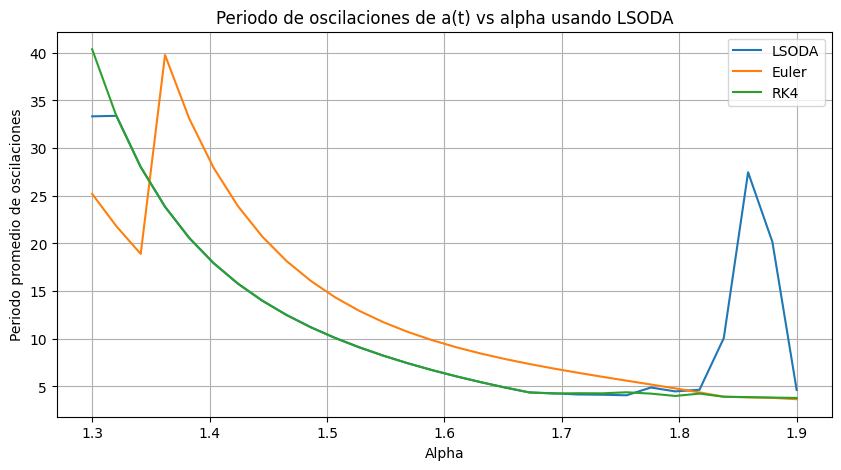

Tiempo de ejecucion del metodo LSODA para varios alpha: 16.7459 segundos


In [62]:
#Metodo de scipy
metodo = 'LSODA'

#Condiciones iniciales
k1 = params["k1"][1]
k2 = params["k2"][1]
a0 = params["a0"][1]
m0 = params["m0"][1]

#Rango de alpha
alphas = np.linspace(1.3, 1.9, 30) #Entre 1.3 y 1.9, con aumento de 0.02

def sistema(t, y, k1, k2, alpha):
    a, m = y
    s = 1.0 - a - m
    da_dt = s - k1 * (m ** 2) * a
    dm_dt = k1 * (m ** 2) * a - k2 * (m ** alpha) * s
    return [da_dt, dm_dt]

# Parametros para solve_ivp
y0 = [a0, m0]  # Condiciones iniciales
t_eval = np.linspace(0, 2000, 20001)  # Puntos donde se evalua la solucion
rtol, atol = 1e-7, 1e-10  # Tolerancias


periodos = []
inicio = time.time()
for alpha in alphas:
    sol = solve_ivp(sistema, [0, 2000], y0, args=(k1, k2, alpha), method=metodo, t_eval=t_eval, rtol=rtol, atol=atol)
    a = sol.y[0]
    t = sol.t
    error = sol.message
    success = sol.success

    #Si el metodo no convergio, imprimimos el mensaje y el valor de alpha
    if success == False:
        print(f"El metodo {metodo} no convergio para alpha={alpha}. Mensaje: {error}")

    

    # Encontrar maximos locales en a(t)
    maximos, idx = find_peaks(a, height=0)

    # Calcular periodo promedio si hay al menos dos maximos
    if len(maximos) > 1:
        tiempo_maximos = t[maximos]
        periods = np.diff(tiempo_maximos)
        periodo_prom = np.mean(periods)
        periodos.append(periodo_prom)

fin = time.time()
tiempo_lsoda = fin - inicio

# Graficar periodo vs alpha
plt.figure(figsize=(10, 5))
plt.plot(alphas, periodos, label=metodo)
plt.plot(alphas, periodos_euler, label='Euler')
plt.plot(alphas, periodos_rk4, label='RK4')
plt.title(f'Periodo de oscilaciones de a(t) vs alpha usando {metodo}')
plt.xlabel('Alpha')
plt.ylabel('Periodo promedio de oscilaciones')
plt.legend()
plt.grid()
plt.show()

print(f"Tiempo de ejecucion del metodo {metodo} para varios alpha: {tiempo_lsoda:.4f} segundos")


### Radau

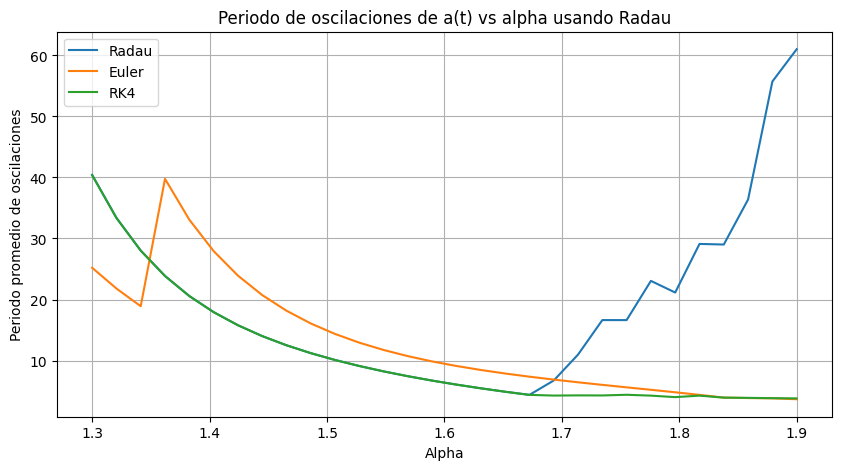

Tiempo de ejecucion del metodo Radau para varios alpha: 203.8080 segundos


In [63]:
#Metodo de scipy
metodo = 'Radau'

#Condiciones iniciales
k1 = params["k1"][1]
k2 = params["k2"][1]
a0 = params["a0"][1]
m0 = params["m0"][1]

#Rango de alpha
alphas = np.linspace(1.3, 1.9, 30) #Entre 1.3 y 1.9, con aumento de 0.02

def sistema(t, y, k1, k2, alpha):
    a, m = y
    s = 1.0 - a - m
    da_dt = s - k1 * (m ** 2) * a
    dm_dt = k1 * (m ** 2) * a - k2 * (m ** alpha) * s
    return [da_dt, dm_dt]

# Parametros para solve_ivp
y0 = [a0, m0]  # Condiciones iniciales
t_eval = np.linspace(0, 2000, 20001)  # Puntos donde se evalua la solucion
rtol, atol = 1e-7, 1e-10  # Tolerancias


periodos = []
inicio = time.time()
for alpha in alphas:
    sol = solve_ivp(sistema, [0, 2000], y0, args=(k1, k2, alpha), method=metodo, t_eval=t_eval, rtol=rtol, atol=atol)
    a = sol.y[0]
    t = sol.t
    error = sol.message
    success = sol.success

    #Si el metodo no convergio, imprimimos el mensaje y el valor de alpha
    if success == False:
        print(f"El metodo {metodo} no convergio para alpha={alpha}. Mensaje: {error}")

    

    # Encontrar maximos locales en a(t)
    maximos, idx = find_peaks(a, height=0)

    # Calcular periodo promedio si hay al menos dos maximos
    if len(maximos) > 1:
        tiempo_maximos = t[maximos]
        periods = np.diff(tiempo_maximos)
        periodo_prom = np.mean(periods)
        periodos.append(periodo_prom)

fin = time.time()
tiempo_radau = fin - inicio

# Graficar periodo vs alpha
plt.figure(figsize=(10, 5))
plt.plot(alphas, periodos, label=metodo)
plt.plot(alphas, periodos_euler, label='Euler')
plt.plot(alphas, periodos_rk4, label='RK4')
plt.title(f'Periodo de oscilaciones de a(t) vs alpha usando {metodo}')
plt.xlabel('Alpha')
plt.ylabel('Periodo promedio de oscilaciones')
plt.legend()
plt.grid()
plt.show()

print(f"Tiempo de ejecucion del metodo {metodo} para varios alpha: {tiempo_radau:.4f} segundos")


### BDF

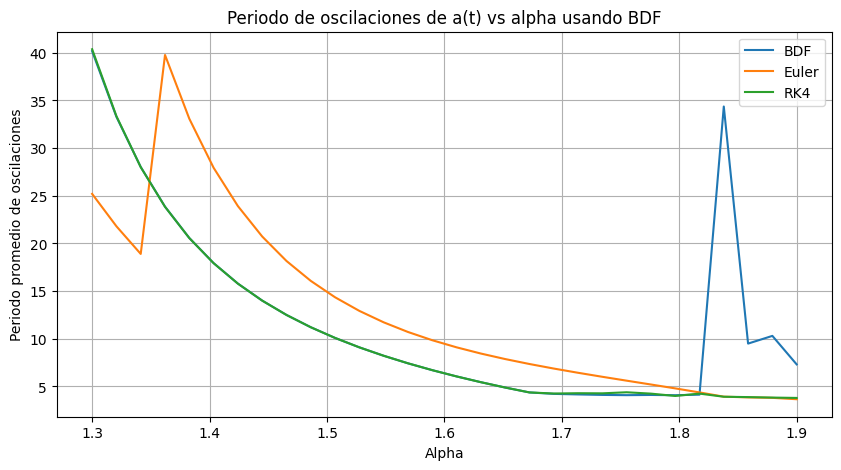

Tiempo de ejecucion del metodo BDF para varios alpha: 170.0989 segundos


In [64]:
#Metodo de scipy
metodo = 'BDF'

#Condiciones iniciales
k1 = params["k1"][1]
k2 = params["k2"][1]
a0 = params["a0"][1]
m0 = params["m0"][1]

#Rango de alpha
alphas = np.linspace(1.3, 1.9, 30) #Entre 1.3 y 1.9, con aumento de 0.02

def sistema(t, y, k1, k2, alpha):
    a, m = y
    s = 1.0 - a - m
    da_dt = s - k1 * (m ** 2) * a
    dm_dt = k1 * (m ** 2) * a - k2 * (m ** alpha) * s
    return [da_dt, dm_dt]

# Parametros para solve_ivp
y0 = [a0, m0]  # Condiciones iniciales
t_eval = np.linspace(0, 2000, 20001)  # Puntos donde se evalua la solucion
rtol, atol = 1e-7, 1e-10  # Tolerancias


periodos = []
inicio = time.time()
for alpha in alphas:
    sol = solve_ivp(sistema, [0, 2000], y0, args=(k1, k2, alpha), method=metodo, t_eval=t_eval, rtol=rtol, atol=atol)
    a = sol.y[0]
    t = sol.t
    error = sol.message
    success = sol.success

    #Si el metodo no convergio, imprimimos el mensaje y el valor de alpha
    if success == False:
        print(f"El metodo {metodo} no convergio para alpha={alpha}. Mensaje: {error}")

    

    # Encontrar maximos locales en a(t)
    maximos, idx = find_peaks(a, height=0)

    # Calcular periodo promedio si hay al menos dos maximos
    if len(maximos) > 1:
        tiempo_maximos = t[maximos]
        periods = np.diff(tiempo_maximos)
        periodo_prom = np.mean(periods)
        periodos.append(periodo_prom)

fin = time.time()
tiempo_bdf = fin - inicio

# Graficar periodo vs alpha
plt.figure(figsize=(10, 5))
plt.plot(alphas, periodos, label=metodo)
plt.plot(alphas, periodos_euler, label='Euler')
plt.plot(alphas, periodos_rk4, label='RK4')
plt.title(f'Periodo de oscilaciones de a(t) vs alpha usando {metodo}')
plt.xlabel('Alpha')
plt.ylabel('Periodo promedio de oscilaciones')
plt.legend()
plt.grid()
plt.show()

print(f"Tiempo de ejecucion del metodo {metodo} para varios alpha: {tiempo_bdf:.4f} segundos")


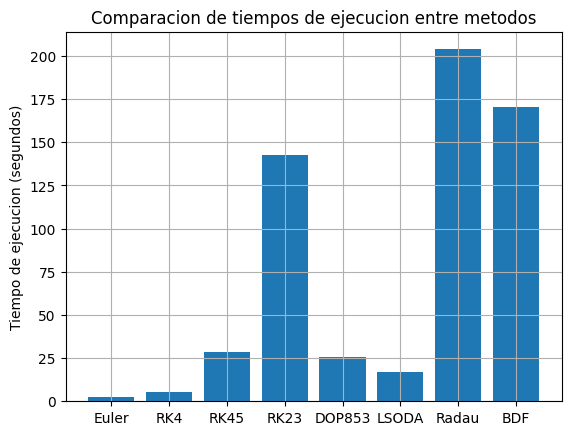

In [66]:
plt.bar(['Euler', 'RK4', 'RK45', 'RK23', 'DOP853', 'LSODA', 'Radau', 'BDF'], [tiempo_euler, tiempo_rk4, tiempo_rk45, tiempo_rk23, tiempo_dop, tiempo_lsoda, tiempo_radau, tiempo_bdf])
plt.ylabel('Tiempo de ejecucion (segundos)')
plt.title('Comparacion de tiempos de ejecucion entre metodos')
plt.grid()
plt.show()


Luego de utilizar todos los metodos disponibles de la funcion solve_ivp() y de graficar los distintos tiempos de ejecución, notamos que aquel con mejor eficacidad es sin duda Runge-Kutta 45, siendo el único método junto con Radau en el que se logra convergencia para todos los valores de alpha además de ser el con mejor tiempo de ejecución. Al compararlo con el método implementado a mano se logran practicamente los mismos resultados.